In [33]:
import pandas as pd
import seaborn as sns

In [45]:
dataset_file_path = "resources/dataset_2021-5-26-10-14.csv" # Caminho para o arquivo onde há o data_set
profile_output = "output.html" # caminho onde o profile será salvo
n_sample = 2000 # Tamanho da amostra para análise exploratória
figures_dir = "figures"
sample_plot_file = "dataset.png"
total_correlation = "total_corr.png"
default_0_correlation = "default_0_corr.png"
default_1_correlation = "default_1_corr.png"

In [46]:
# Lê arquivo com os dados e pega uma amostra dos dados

dataset = pd.read_csv(dataset_file_path, sep="\t", encoding="utf-8")
sample = dataset.sample(n=n_sample)

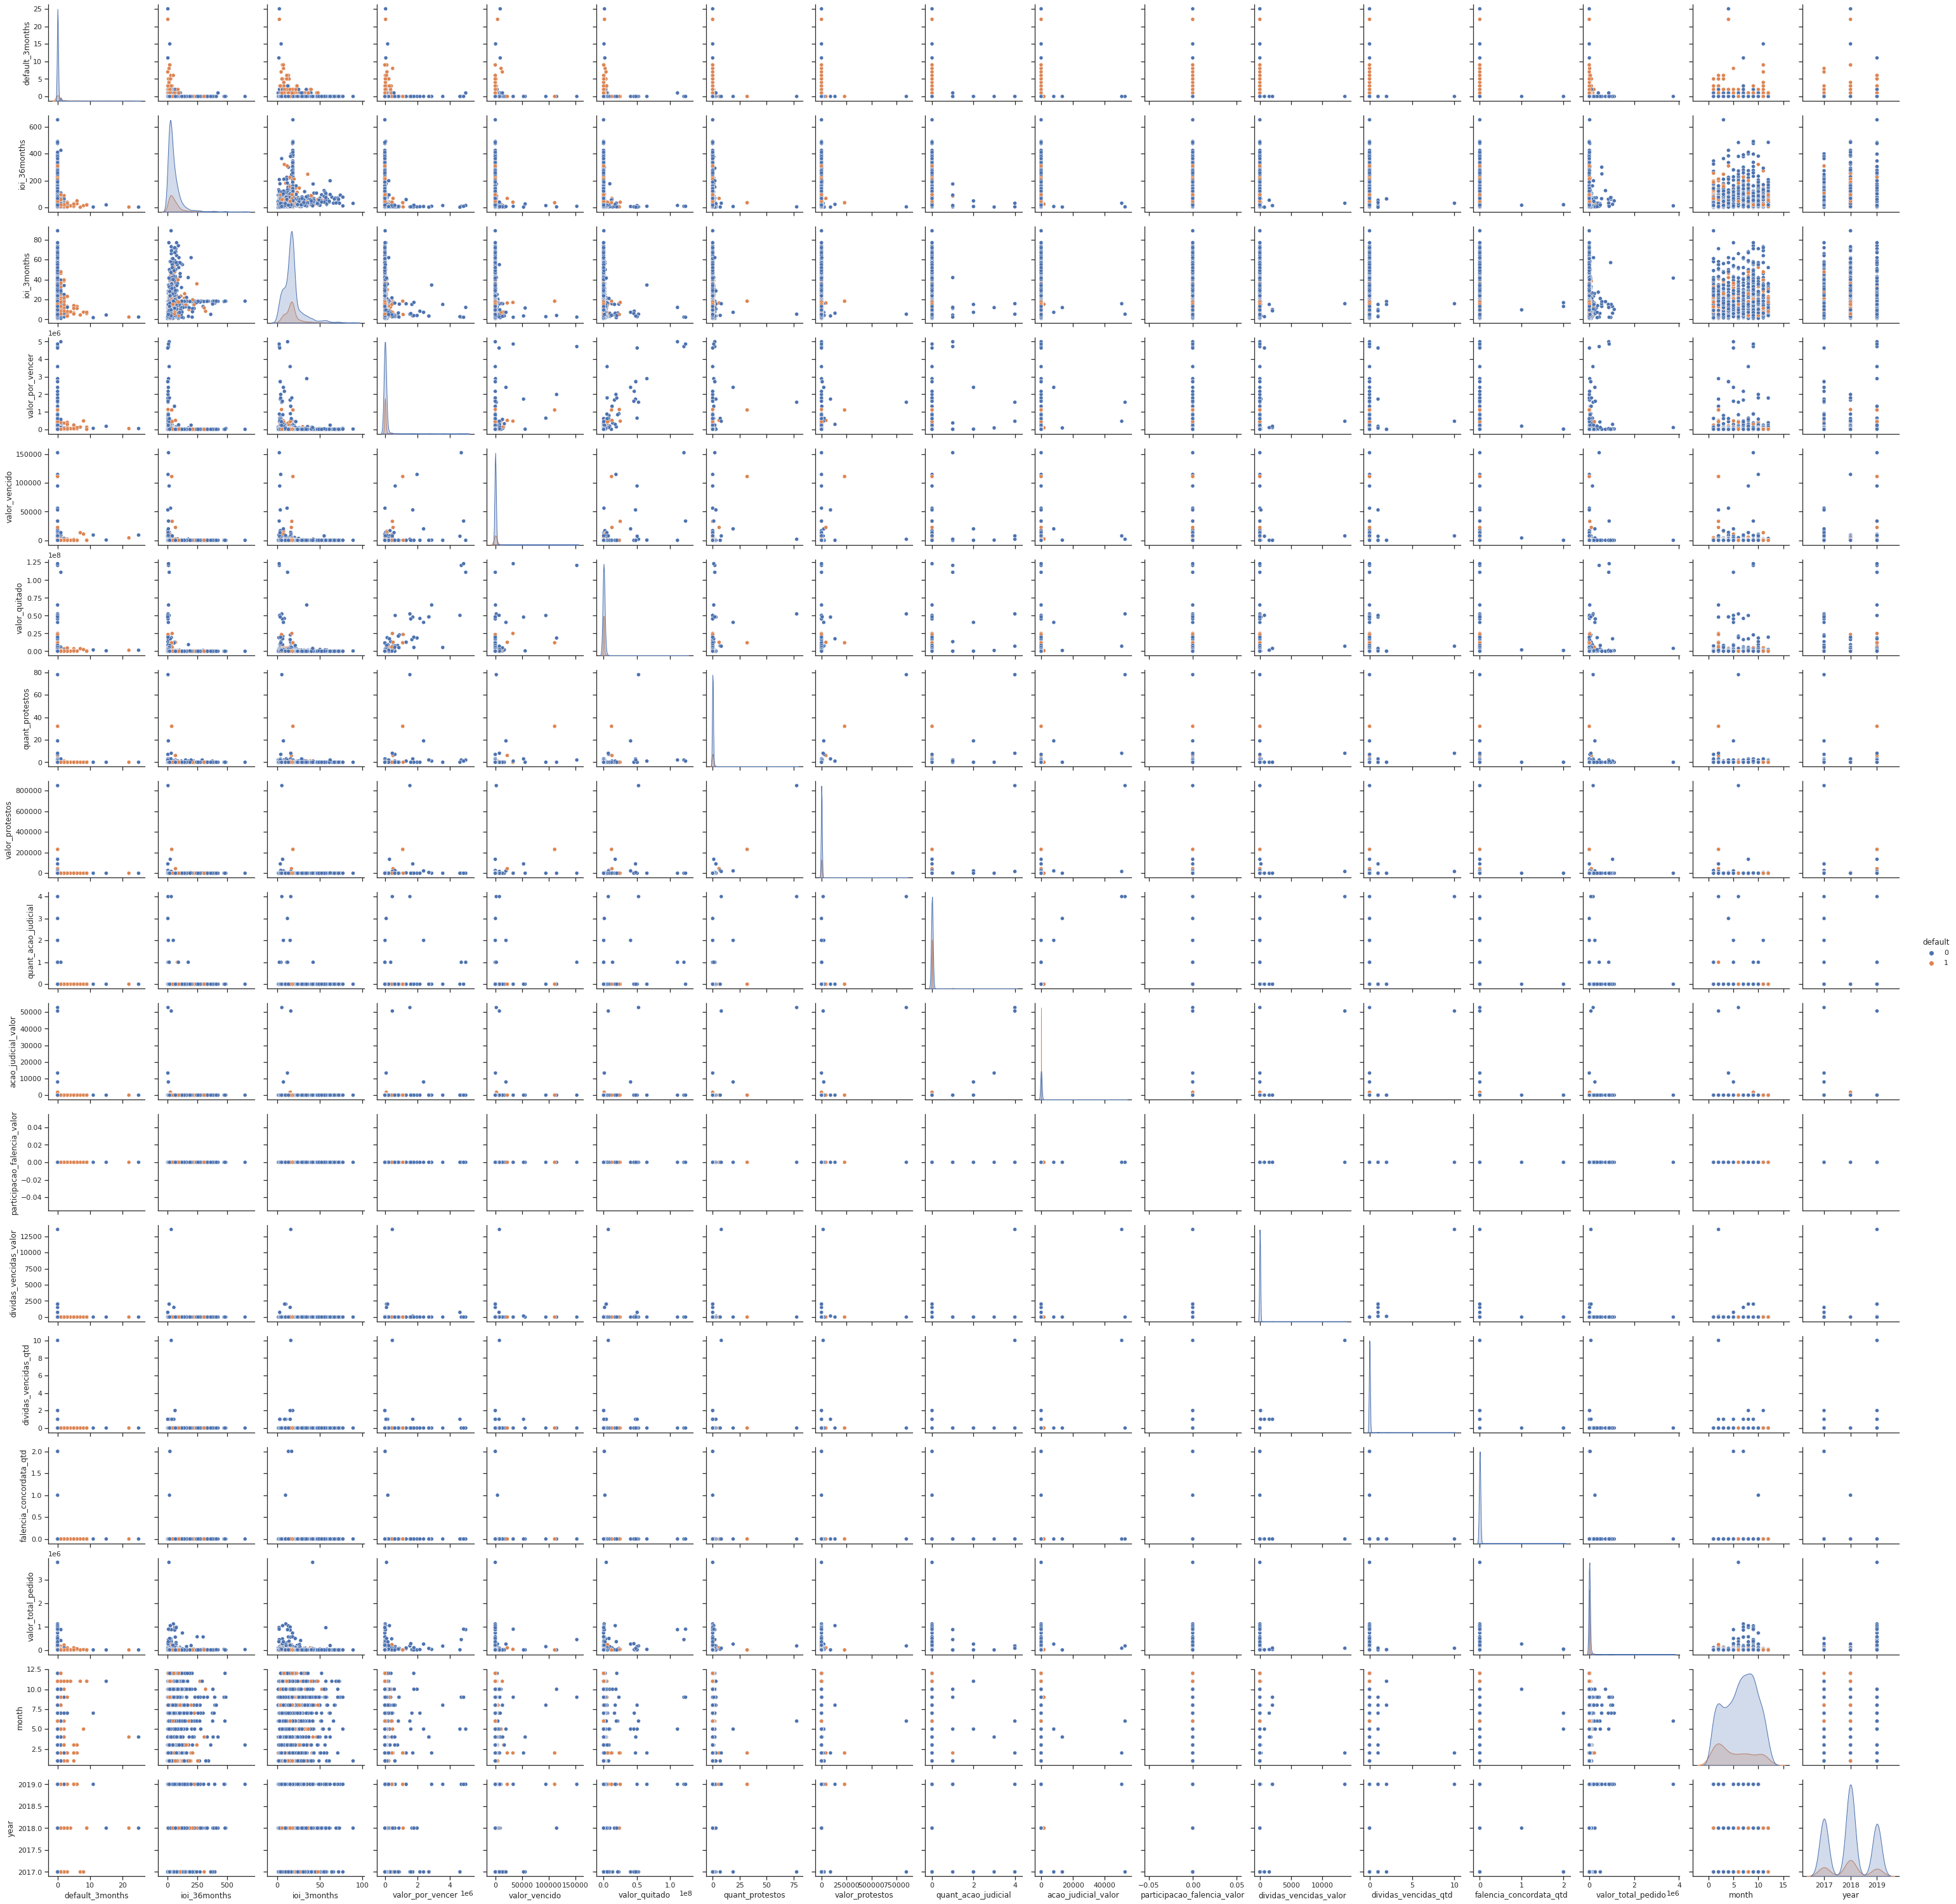

In [47]:
# Salva figura com a distribuição de cada coluna (numérica) para a amostra
sns_plot = sns.pairplot(sample, hue="default")
sns_plot.savefig(f"{figures_dir}/{sample_plot_file}")

In [37]:
# Define função com análise simplificada do dataset

def dataset_analysis(dataframe):
    columns = []
    uniques = []
    missing = []
    minimum = []
    maximum = []
    type_ = []
    for column in dataframe:
        unique = set(dataframe[column])
        columns.append(column)
        uniques.append(len(unique))
        missing.append(dataframe[column].isnull().mean()*100)
        type_.append(dataframe[column].dtype)
        minimum.append(dataframe[column].min())
        maximum.append(dataframe[column].max())
    data = [columns,uniques,missing, type_, minimum, maximum]
    df =  pd.DataFrame(data)
    df = df.transpose()
    df.columns = ["column", "n_uniques", "missing", "type", "minimum","maximum"]
    return df
unique = dataset_analysis(dataset)
unique

,column,n_uniques,missing,type,minimum,maximum
0,default_3months,26,0.0,int64,0,26
1,ioi_36months,35593,0.0,float64,1.0,951.0
2,ioi_3months,16248,0.0,float64,1.0,90.0
3,valor_por_vencer,81251,0.0,float64,0.0,72197586.36
4,valor_vencido,9944,0.0,float64,0.0,13150500.0
5,valor_quitado,92993,0.0,float64,0.0,460320322.8
6,quant_protestos,60,0.0,int64,0,2324
7,valor_protestos,1828,0.0,float64,0.0,16305457.0
8,quant_acao_judicial,17,0.0,int64,0,80
9,acao_judicial_valor,110,0.0,float64,0.0,8390986.0


In [38]:
# Cria datasets separados por default 
default_0 = dataset[dataset["default"]==0]
default_1 = dataset[dataset["default"]==1]

In [39]:
dataset_analysis(default_1)

,column,n_uniques,missing,type,minimum,maximum
0,default_3months,26,0.0,int64,0,26
1,ioi_36months,17552,0.0,float64,1.0,846.0
2,ioi_3months,15494,0.0,float64,1.0,89.0
3,valor_por_vencer,15943,0.0,float64,0.0,2857562.24
4,valor_vencido,3935,0.0,float64,0.0,1582700.0
5,valor_quitado,17855,0.0,float64,0.0,73275423.69
6,quant_protestos,30,0.0,int64,0,176
7,valor_protestos,999,0.0,float64,0.0,1816108.0
8,quant_acao_judicial,8,0.0,int64,0,15
9,acao_judicial_valor,53,0.0,float64,0.0,64308.0


In [40]:
dataset_analysis(default_0)

,column,n_uniques,missing,type,minimum,maximum
0,default_3months,17,0.0,int64,0,25
1,ioi_36months,20042,0.0,float64,1.0,951.0
2,ioi_3months,1418,0.0,float64,1.0,90.0
3,valor_por_vencer,65589,0.0,float64,0.0,72197586.36
4,valor_vencido,6084,0.0,float64,0.0,13150500.0
5,valor_quitado,75679,0.0,float64,0.0,460320322.8
6,quant_protestos,55,0.0,int64,0,2324
7,valor_protestos,901,0.0,float64,0.0,16305457.0
8,quant_acao_judicial,15,0.0,int64,0,80
9,acao_judicial_valor,62,0.0,float64,0.0,8390986.0


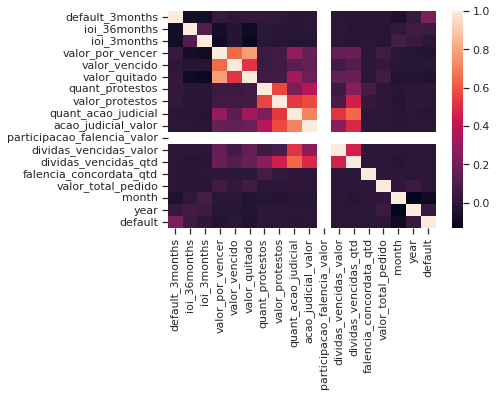

In [41]:
# Salva a correlação entre as variaveis para todo o dataset
Var_Corr = dataset.corr()
total_heatmap = sns.heatmap(Var_Corr).get_figure()
total_heatmap.savefig(f"{figures_dir}/{total_correlation}")

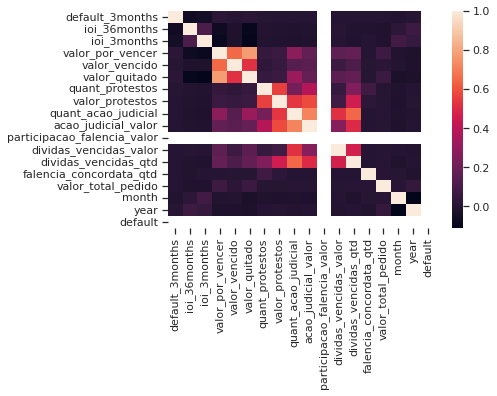

In [42]:
# Salva a correlação entre as variaveis para o dataset default_0

Var_Corr = default_0.corr()
default_0_heatmap = sns.heatmap(Var_Corr).get_figure()
default_0_heatmap.savefig(f"{figures_dir}/{default_0_correlation}")

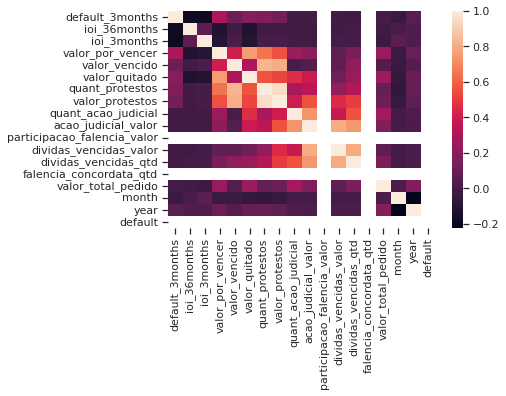

In [43]:
# Salva a correlação entre as variaveis para o dataset default_1

Var_Corr = default_1.corr()
default_1_heatmap = sns.heatmap(Var_Corr).get_figure()
default_1_heatmap.savefig(f"{figures_dir}/{default_1_correlation}")